In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

## 데이터 다운로드

In [2]:
test_df = pd.read_csv("titanic/test.csv")
train_df = pd.read_csv("titanic/train.csv")
gender_submission_df = pd.read_csv("titanic/gender_submission.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Age, Cabin, Embraked column has NA

Age's type is float64 -> make int64

In [4]:
train_df["Ticket"].value_counts()

1601                7
347082              7
CA. 2343            7
3101295             6
347088              6
CA 2144             6
S.O.C. 14879        5
382652              5
347077              4
17421               4
W./C. 6608          4
4133                4
349909              4
19950               4
2666                4
113781              4
LINE                4
PC 17757            4
113760              4
248727              3
239853              3
110413              3
13502               3
F.C.C. 13529        3
29106               3
347742              3
PC 17755            3
363291              3
PC 17572            3
345773              3
                   ..
SC/PARIS 2133       1
113514              1
SC/AH 29037         1
PC 17759            1
237565              1
3101276             1
SOTON/OQ 392090     1
112050              1
C.A. 29395          1
349246              1
243880              1
3101277             1
392092              1
349233              1
330979    

In [5]:
train_df["Cabin"].value_counts()

B96 B98            4
G6                 4
C23 C25 C27        4
F33                3
D                  3
E101               3
F2                 3
C22 C26            3
C83                2
B35                2
B22                2
B57 B59 B63 B66    2
E121               2
C124               2
D33                2
F G73              2
D26                2
C125               2
E8                 2
D36                2
C93                2
E24                2
C78                2
B18                2
C65                2
D20                2
C92                2
B49                2
D17                2
C123               2
                  ..
D47                1
B101               1
B42                1
C90                1
B80                1
A34                1
B41                1
C7                 1
B37                1
A24                1
E46                1
E40                1
B73                1
A31                1
C111               1
D10 D12            1
C95          

In [6]:
train_df["Embarked"].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [7]:
train_df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [8]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## 데이터 탐색, 시각화

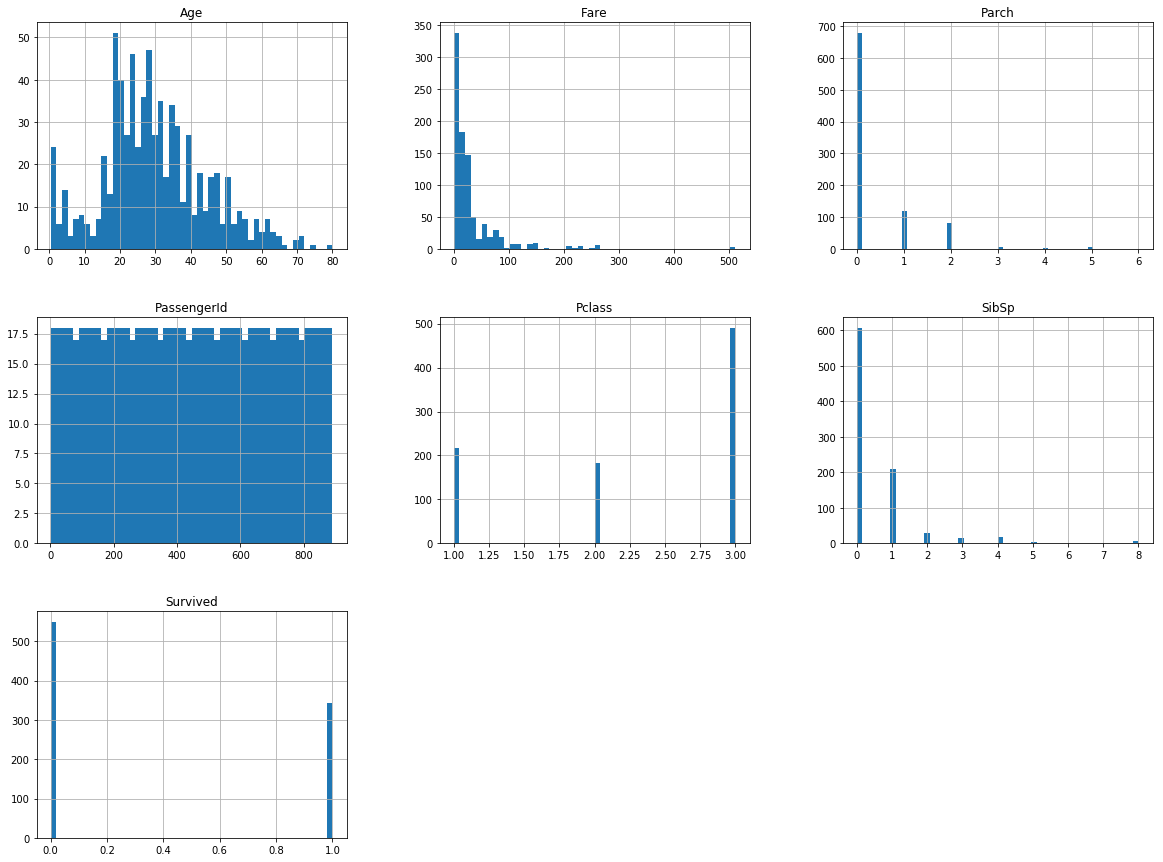

In [9]:
train_df.hist(bins=50, figsize=(20,15))
plt.show()

feature scaling is necessary

In [10]:
train_df_age = train_df[["Age", "Survived"]].copy().dropna()

In [11]:
train_df_age.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 0 to 890
Data columns (total 2 columns):
Age         714 non-null float64
Survived    714 non-null int64
dtypes: float64(1), int64(1)
memory usage: 16.7 KB


In [12]:
age_cut = pd.cut(train_df_age["Age"], np.arange(0, 90, 10))

Text(0, 0.5, 'Surival rate')

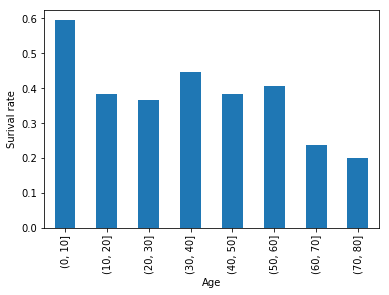

In [13]:
survival_rate_by_age = train_df_age.groupby(age_cut)["Survived"].mean()
survival_rate_by_age.plot(kind="bar")
plt.ylabel("Surival rate")

(0, 10]세의 생존률 상당히 높음

(10, 60]세의 생존률은 비슷, 중간

(60, 80]세의 생존률은 낮음

In [14]:
def survival_rate(feature, cut_num=3):
    train_df_feature = train_df[["Survived", feature]]
    feature_cut = pd.qcut(train_df[feature], cut_num)
    return train_df_feature.groupby(feature_cut)["Survived"].mean()

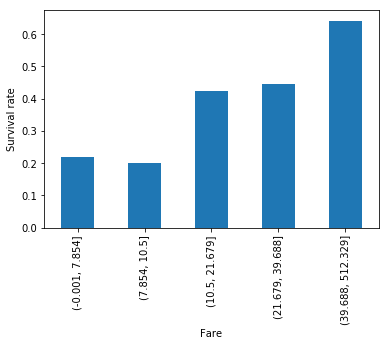

In [15]:
SR_by_fare = survival_rate("Fare", 5)

def SR_plot(SR_df):
    SR_df.plot(kind="bar")
    plt.ylabel("Survival rate")

SR_plot(SR_by_fare)

Fare이 높을수록 생존률이 높음

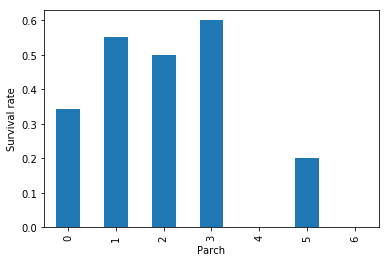

In [16]:
SR_by_parch = train_df.groupby("Parch")["Survived"].mean()
SR_plot(SR_by_parch)

Parch와 생존률은 무관계

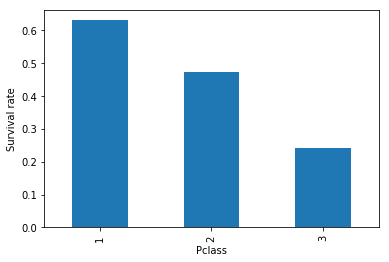

In [17]:
def SR_plot_cat(feature):
    SR_plot(train_df.groupby(feature)["Survived"].mean().dropna())

SR_plot_cat("Pclass")

Pclass가 클수록 생존률이 감소

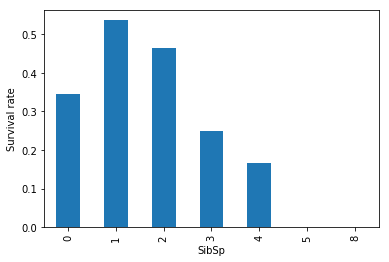

In [18]:
SR_plot_cat("SibSp")

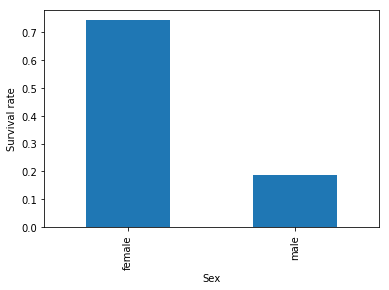

In [19]:
SR_plot_cat("Sex")

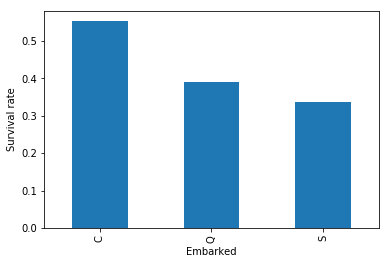

In [20]:
SR_plot_cat("Embarked")

### 생존률과 관계 있어 보인 특성

Age(-), Fare(+), Pclass(-), Sex, Embarked 아마도 SibSp(if not 0, -)

## 데이터 준비

In [91]:
num_attribs = ["Age", "Fare"]
cat_attribs = ["Sex", "Embarked", "Pclass"]

In [92]:
train_df_selected = train_df[num_attribs + cat_attribs]

In [93]:
train_df_selected.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
Age         714 non-null float64
Fare        891 non-null float64
Sex         891 non-null object
Embarked    889 non-null object
Pclass      891 non-null int64
dtypes: float64(2), int64(1), object(2)
memory usage: 34.9+ KB


In [94]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="most_frequent")
imputer.fit(train_df_selected)

SimpleImputer(copy=True, fill_value=None, missing_values=nan,
       strategy='most_frequent', verbose=0)

In [95]:
most_frequents = imputer.statistics_

In [96]:
X_train = imputer.transform(train_df_selected)
X_train_df = DataFrame(X_train, columns=train_df_selected.columns,
                       index = list(train_df_selected.index.values))

In [97]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(categories='auto'), cat_attribs)
    ])

X_train = pipeline.fit_transform(X_train_df)
X_train

C:\Users\jm040\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\jm040\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


array([[-0.49779327, -0.50244517,  0.        , ...,  0.        ,
         0.        ,  1.        ],
       [ 0.71504807,  0.78684529,  1.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.19458293, -0.48885426,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [-0.3461881 , -0.17626324,  1.        , ...,  0.        ,
         0.        ,  1.        ],
       [-0.19458293, -0.04438104,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.26023257, -0.49237783,  0.        , ...,  0.        ,
         0.        ,  1.        ]])

In [98]:
X_train.shape

(891, 10)

In [99]:
y_train = np.array(train_df["Survived"])

## 모델 선택, 훈련

Stochastic Gradient Descent(SGD)

In [100]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(max_iter=100, random_state=42, tol=1e-9)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=100,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=1e-09,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, y_train, cv=4, scoring="accuracy")

array([0.75892857, 0.78923767, 0.75225225, 0.76126126])

Random Forest

In [102]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(n_estimators=100, random_state=42)
forest_clf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [103]:
cross_val_score(forest_clf, X_train, y_train, cv=4, scoring="accuracy")

array([0.75892857, 0.83856502, 0.82882883, 0.80630631])

KNN

In [104]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [105]:
cross_val_score(knn_clf, X_train, y_train, cv=4, scoring="accuracy")

array([0.78571429, 0.82959641, 0.83333333, 0.82432432])

결과: Random Forest, KNN

## 모델 세부 튜닝

Random Forest

In [106]:
from sklearn.model_selection import GridSearchCV

#n_estimators, max_features
forest_param_grid = [
    {'n_estimators': [50, 100, 200], 'max_features': ["auto", "sqrt", "log2"]}
]

forest_grid_search = GridSearchCV(forest_clf, forest_param_grid, cv=3,
                                  scoring='accuracy', verbose=3, n_jobs=-1,
                                  return_train_score=True)

forest_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:    5.4s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'n_estimators': [50, 100, 200], 'max_features': ['auto', 'sqrt', 'log2']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [107]:
forest_cvres = forest_grid_search.cv_results_
forest_cvres.keys()

dict_keys(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time', 'param_max_features', 'param_n_estimators', 'params', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'mean_test_score', 'std_test_score', 'rank_test_score', 'split0_train_score', 'split1_train_score', 'split2_train_score', 'mean_train_score', 'std_train_score'])

In [108]:
def print_GS_results(grid_search):
    cvres = grid_search.cv_results_
    for mean_score, param, rank in zip(cvres["mean_test_score"], cvres["params"],
                                       cvres["rank_test_score"]):
        print(mean_score, param, rank)

print_GS_results(forest_grid_search)

0.8035914702581369 {'max_features': 'auto', 'n_estimators': 50} 1
0.8013468013468014 {'max_features': 'auto', 'n_estimators': 100} 7
0.8024691358024691 {'max_features': 'auto', 'n_estimators': 200} 4
0.8035914702581369 {'max_features': 'sqrt', 'n_estimators': 50} 1
0.8013468013468014 {'max_features': 'sqrt', 'n_estimators': 100} 7
0.8024691358024691 {'max_features': 'sqrt', 'n_estimators': 200} 4
0.8035914702581369 {'max_features': 'log2', 'n_estimators': 50} 1
0.8013468013468014 {'max_features': 'log2', 'n_estimators': 100} 7
0.8024691358024691 {'max_features': 'log2', 'n_estimators': 200} 4


KNN

In [109]:
#weights, n_neighbors
knn_param_grid = [
    {'weights': ['uniform', 'distance'], 'n_neighbors': [3, 5, 10]}
]

knn_grid_search = GridSearchCV(knn_clf, knn_param_grid, cv=3,
                               scoring='accuracy', verbose=3, n_jobs=-1,
                               return_train_score=True)

knn_grid_search.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=-1)]: Done   4 out of  18 | elapsed:    0.0s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  18 out of  18 | elapsed:    0.2s finished


GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform', 'distance'], 'n_neighbors': [3, 5, 10]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=3)

In [110]:
print_GS_results(knn_grid_search)

0.8080808080808081 {'n_neighbors': 3, 'weights': 'uniform'} 1
0.797979797979798 {'n_neighbors': 3, 'weights': 'distance'} 5
0.8069584736251403 {'n_neighbors': 5, 'weights': 'uniform'} 2
0.8002244668911336 {'n_neighbors': 5, 'weights': 'distance'} 3
0.797979797979798 {'n_neighbors': 10, 'weights': 'uniform'} 5
0.7991021324354658 {'n_neighbors': 10, 'weights': 'distance'} 4


결과: 최상의 모델

KNN - 0.8080808080808081 {'n_neighbors': 3, 'weights': 'uniform'} 1

## 테스트 세트로 시스템 평가

In [111]:
final_model = knn_grid_search.best_estimator_

test_df_selected = test_df[num_attribs + cat_attribs]

X_test = imputer.transform(test_df_selected)
X_test_df = DataFrame(X_test, columns=test_df_selected.columns,
                      index=list(test_df_selected.index.values))
X_test = pipeline.transform(X_test_df)

final_predictions = final_model.predict(X_test)

C:\Users\jm040\Anaconda3\lib\site-packages\sklearn\pipeline.py:605: DataConversionWarning: Data with input dtype object were all converted to float64 by StandardScaler.
  res = transformer.transform(X)


In [119]:
final_pred_df = DataFrame({"PassengerId": test_df.PassengerId,
                           "Survived": final_predictions})

In [120]:
final_pred_df.to_csv("submission.csv",index=False)

# 2019-03-12 0.71291